# Solving $Ax = b$: Row Reduced Form $R$

# 1) Derivation

To solve a linear system $Ax = b$:

1. Form the augmented matrix $[A|b]$.
2. Apply Gaussian elimination (row operations) to reduce $[A|b]$ into row reduced echelon form (RREF):
$$ [A|b] ;; \xrightarrow{\text{row operations}} ;; [R|c] $$
where $R$ is the row-reduced form of $A$.
3. Identify pivot variables (determined by pivots in $R$) and free variables (non-pivots).
4. Construct the solution:
   * If the system is consistent, solutions are expressed as $x = x_p + x_h$ (particular + homogeneous).
   * If the system is inconsistent, no solution exists.

# 2) Definition
* Row Reduced Form (RREF): A matrix where each leading entry in a row is 1, and is the only nonzero entry in its column.
* Particular Solution: A specific solution that satisfies $Ax=b$.
* Homogeneous Solution: Solutions to $Ax=0$ (null space).

General solution:
$$ x = x_p + x_h $$

# 3) Computation (Step-by-Step)

In [1]:

import numpy as np
from sympy import Matrix

# Example system
A = Matrix([[2, 1, -1],
            [-3, -1, 2],
            [-2, 1, 2]])
b = Matrix([8, -11, -3])

print("Original System: A|b")
display(A.row_join(b))

# Step 1: Row reduce augmented matrix
Ab = A.row_join(b)
rref_matrix, pivots = Ab.rref()
print("\nStep 1: Row Reduced Echelon Form (RREF):")
display(rref_matrix)
print("Pivot columns:", pivots)

# Step 2: Check consistency
rank_A = A.rank()
rank_Ab = Ab.rank()
print("\nStep 2: Rank(A) =", rank_A, ", Rank([A|b]) =", rank_Ab)

if rank_A == rank_Ab:
    print("=> System is Consistent")
else:
    print("=> System is Inconsistent (No Solution)")

# Step 3: Compute solutions
sol = A.gauss_jordan_solve(b)
print("\nStep 3: Solution to Ax = b:")
print(sol)

Original System: A|b


Matrix([
[ 2,  1, -1,   8],
[-3, -1,  2, -11],
[-2,  1,  2,  -3]])


Step 1: Row Reduced Echelon Form (RREF):


Matrix([
[1, 0, 0,  2],
[0, 1, 0,  3],
[0, 0, 1, -1]])

Pivot columns: (0, 1, 2)

Step 2: Rank(A) = 3 , Rank([A|b]) = 3
=> System is Consistent

Step 3: Solution to Ax = b:
(Matrix([
[ 2],
[ 3],
[-1]]), Matrix(0, 1, []))


# 4) Plotting

We plot the solution space geometrically:

* For 3 variables, each equation is a plane in $\mathbb{R}^3$.
* The intersection is the solution set.

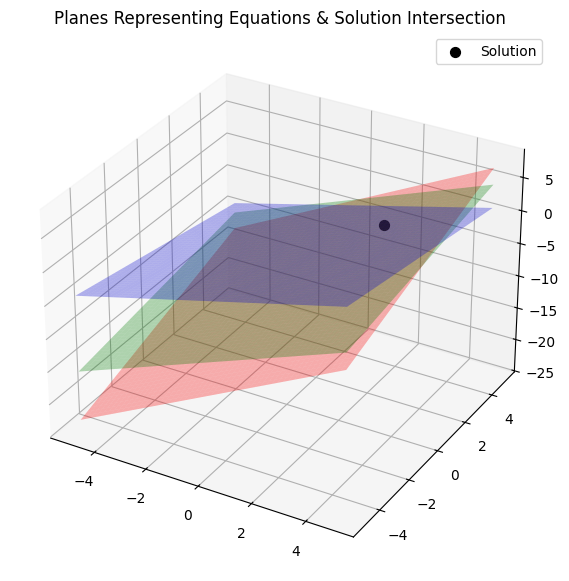

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Planes from system Ax = b
x_vals = np.linspace(-5,5,50)
y_vals = np.linspace(-5,5,50)
X, Y = np.meshgrid(x_vals, y_vals)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Eq1: 2x + y - z = 8
Z1 = 2*X + Y - 8
ax.plot_surface(X, Y, Z1, alpha=0.3, color='r')

# Eq2: -3x - y + 2z = -11 -> z = ( -11 + 3x + y)/2
Z2 = ( -11 + 3*X + Y )/2
ax.plot_surface(X, Y, Z2, alpha=0.3, color='g')

# Eq3: -2x + y + 2z = -3 -> z = ( -3 + 2*X - Y)/2
Z3 = ( -3 + 2*X - Y )/2
ax.plot_surface(X, Y, Z3, alpha=0.3, color='b')

# Solution point (from solver)
solution = np.array(sol[0], dtype=float)
ax.scatter(solution[0], solution[1], solution[2], color='k', s=50, label="Solution")

ax.set_title("Planes Representing Equations & Solution Intersection")
ax.legend()
plt.show()

# 5) Use Cases
* Row Reduced Form: Provides a systematic way to solve linear systems.
* Pivot Analysis: Detects dependency among equations.
* Solution Characterization:
   * Unique solution (intersection point).
   * Infinite solutions (line/plane intersection).
   * No solution (inconsistent system).

Applications:

* Solving real-world systems of equations (physics, engineering, economics).
* Linear regression (normal equations).
* Control systems (state-space solutions).
* Computer graphics (geometric transformations).

Key Values Produced:

* Rank → determines consistency and uniqueness.
* RREF → reveals solution structure.
* Solution set → describes feasible values of $x$.